[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb)

## Topic

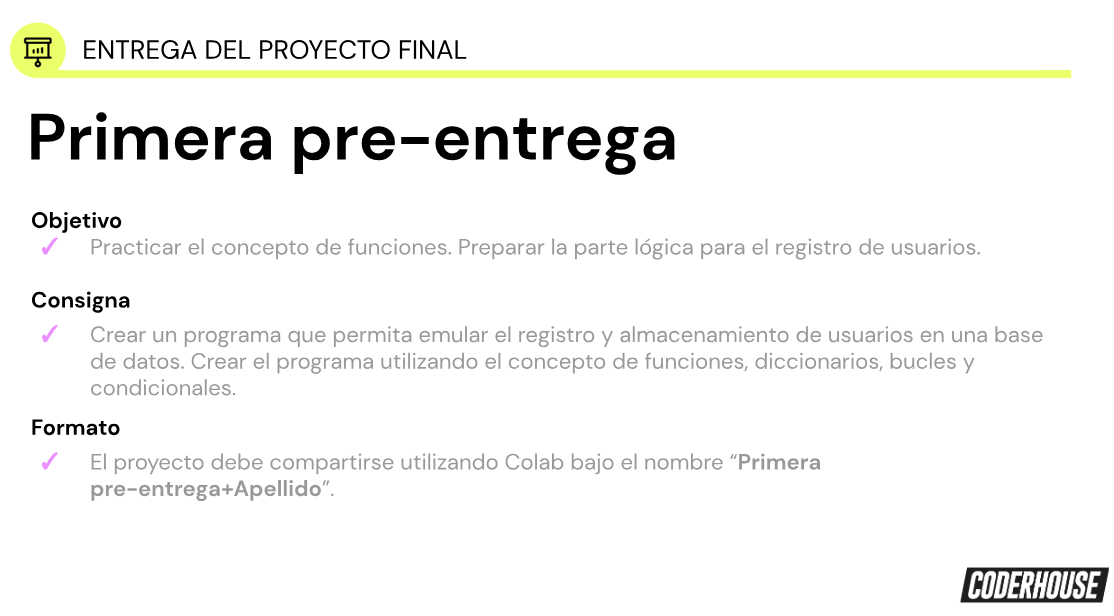

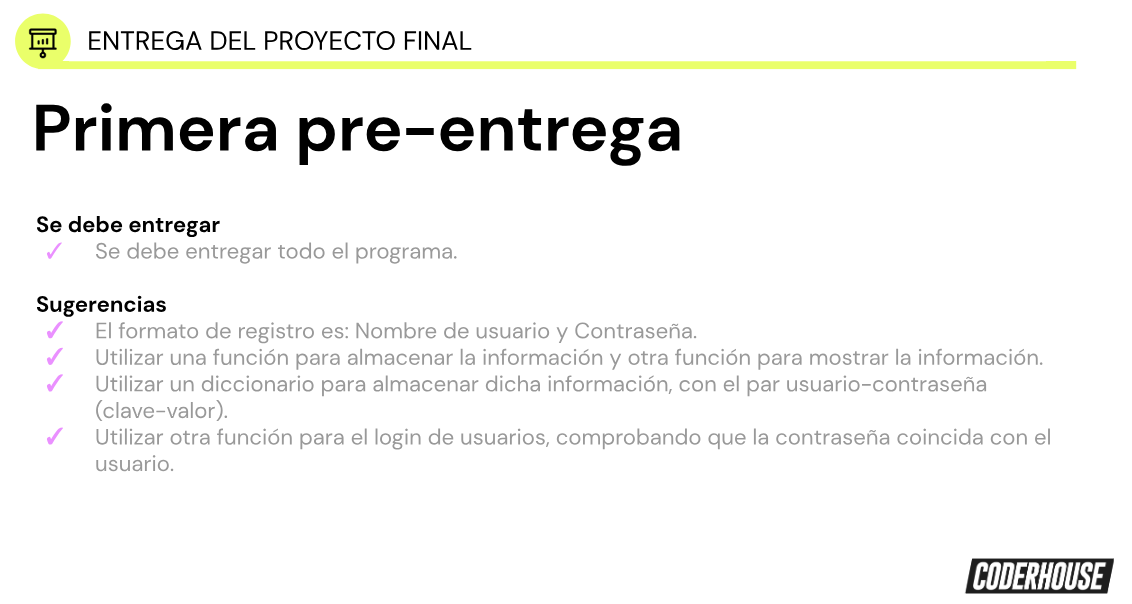

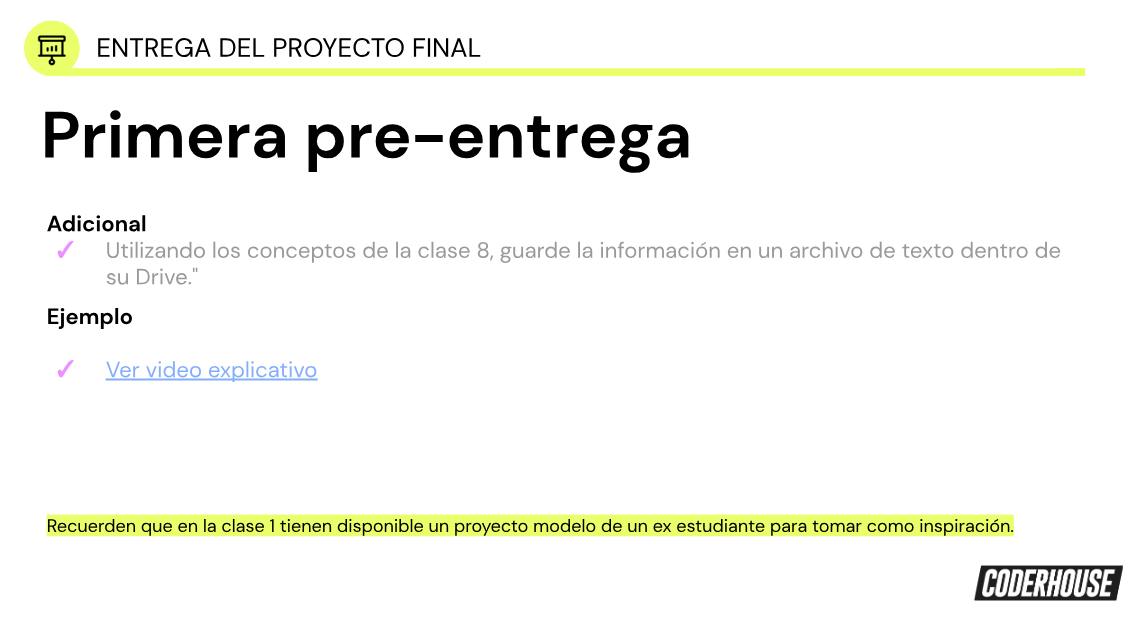

## Data Base Engine

In [7]:

import sqlite3, pdb


# Define the User class
class User:
    def __init__(self, id, username, password):
        self.id = id
        self.username = username
        self.password = password
        self.user_dict = {
            "id"  : id,
            "username" : username,
            "password" : password,
        }

    def __str__(self):
        return f"{self.user_dict}"


class DataBase_session():
    def __init__(self):
        # Create a connection to the SQLite database
        self.conn = sqlite3.connect('user.db')
        self.cursor = self.conn.cursor()


        # Create the users table if it doesn't exist
        self.cursor.execute('''CREATE TABLE IF NOT EXISTS users
                        (id INTEGER PRIMARY KEY AUTOINCREMENT,
                        username TEXT NOT NULL,
                        password TEXT NOT NULL)''')
        self.conn.commit()

    # Define the CRUD functions
    def create_user(self, username, password):
        self.cursor.execute("INSERT INTO users (username, password) VALUES (?, ?)", (username, password))
        self.conn.commit()

    def read_user(self,username):
        self.cursor.execute("SELECT * FROM users WHERE username=?", (username,))
        row = self.cursor.fetchone()
        if row:
            return User(row[0], row[1], row[2])
        return None

    def read_users(self):
        self.cursor.execute("SELECT * FROM users")
        rows = self.cursor.fetchall()
        for row in rows:
            print(row)


    def update_user(self, username, new_password):
        self.cursor.execute("UPDATE users SET password=? WHERE username=?", (new_password, username))
        self.conn.commit()

    def delete_user(self, username):
        self.cursor.execute("DELETE FROM users WHERE username=?", (username,))
        self.conn.commit()

    def login(self, username, password):
        user = self.read_user(username)
        if user and user.password == password:
            return user
        return None

    def update_user_name(self, user_id, username):
        self.cursor.execute("UPDATE users SET username=? WHERE id=?", (username, user_id))
        self.conn.commit()

    def update_user_password(self, user_id, password):
        self.cursor.execute("UPDATE users SET password=? WHERE id=?", (password, user_id))
        self.conn.commit()

    def logout(self, logged_user):
        try:
            del(logged_user)
        except:
            pass


## Front End build

In [8]:
import os, pdb

# Function to clear the console screen
def clear_screen():
    os.system('clear')

# Function to display the main menu
def display_menu():
    clear_screen()
    print("\n############### Welcome to the Database Management System! ###############")
    print("1. Initiate Database Session")
    print("2. Login User Session")
    print("3. Log out User Session")
    print("4. Create a User")
    print("5. Exit")

# Function to display the admin menu
def display_admin_menu():
    clear_screen()
    print("\n######   Admin Menu   #####")
    print("1. Create User")
    print("2. Read User")
    print("3. Update User")
    print("4. Delete User")
    print("5. Go back")

# Function to display the user menu
def display_user_menu():
    clear_screen()
    print("\n######   User Menu    #####")
    print("1. Change username")
    print("2. Change password")
    print("3. Go back")

# Function to handle the main menu options
def handle_menu_choice(choice):

    while True:
        try:
            if choice == "1":
                print("Initiating Database Session...")
                MyDb = DataBase_session()
                print(MyDb)

            elif choice == "2":
                print("Logging in User...")
                username = input("Enter Username: ")
                password = input("Enter Password: ")

                logged_user = MyDb.login(username, password)

                if logged_user:
                    if logged_user.username == "admin" and logged_user.password == "admin":
                        handle_admin_menu(MyDb, logged_user)

                    else:
                        pass
                        handle_user_menu(MyDb, logged_user)

                else:
                    print("Invalid credentials!")


            elif choice == "3":
                if hasattr(logged_user, '__name__'):
                    del(logged_user)
                    print("Logging out User...")

                else:
                    print("not logged yet...")


            elif choice == "4":
                print("Create a User...")
                username = input("Enter a new Username: ")
                password = input("Enter a new Password: ")
                MyDb.create_user(username, password)


            elif choice == "5":
                print("Exiting...")
                try:
                    if hasattr(logged_user, '__name__'):
                        del(logged_user)

                    if hasattr(MyDb, '__name__'):
                        del(MyDb)
                    break
                except:
                    break
            else:
                print("Invalid choice. Please try again.\n")

            display_menu()
            choice = input("\nEnter your choice (1-5): \n")

        except Exception as e:
            print(e)
            choice = None

# Function to handle the admin menu options
def handle_admin_menu(MyDb, logged_user):

    while True:
        display_admin_menu()
        choice = input("Enter your choice (1-5): ")

        if choice == "1":
            print("Create a User...")
            username = input("Enter a new Username: ")
            password = input("Enter a new Password: ")
            MyDb.create_user(username, password)

        elif choice == "2":
            print("Reading Users...")
            MyDb.read_users()


        elif choice == "3":
            print("Updating User...")
            username = input("Enter Username: ")
            password = input("Enter a new Password: ")
            MyDb.update_user(username, password)

        elif choice == "4":
            print("Deleting User...")
            username = input("Enter Username: ")
            MyDb.delete_user(username)

        elif choice == "5":
            MyDb.logout(logged_user)
            print("Go back")
            break

        else:
            print("Invalid choice. Please try again.\n")



# Function to handle the admin menu options
def handle_user_menu(MyDb, logged_user):

    while True:
        display_user_menu()
        choice = input("Enter your choice (1-3): ")

        if choice == "1":
            print("Change username")
            username = input("Enter a new Username: ")
            MyDb.update_user_name(logged_user.id, username)

        elif choice == "2":
            print("Change password")
            password = input("Enter a new Password: ")
            MyDb.update_user_password(logged_user.id, password)

        elif choice == "3":
            MyDb.logout(logged_user)
            print("Go back")
            break

        else:
            print("Invalid choice. Please try again.\n")


# Main program
display_menu()
choice = input("Enter your choice (1-5): ")
handle_menu_choice(choice)



############### Welcome to the Database Management System! ###############
1. Initiate Database Session
2. Login User Session
3. Log out User Session
4. Create a User
5. Exit
Enter your choice (1-5): 5
Exiting...


## Check DB state

In [ ]:
import sqlite3

# Connect to the SQLite database
connection = sqlite3.connect('user.db')

# Create a cursor object
cursor = connection.cursor()

# Execute a sample query
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")

# Fetch all rows from the query result
rows = cursor.fetchall()

# Process the fetched rows
for row in rows:
    print(row)

while True:
    print("\n\nPress q + ENTER to exit\n")
    query = input("insert your SQL Query: ")
    print()

    if query == "q":
        break

    try:
        cursor.execute(query)
        # Fetch all rows from the query result
        rows = cursor.fetchall()
        # Process the fetched rows
        for row in rows:
            print(row)

    except Exception as myExc:
        print(myExc)


# Close the cursor and the database connection
cursor.close()
connection.close()

